## Application of Algorithms to Google Mobility

The purpose of applying the KATS changepoint algorithms to the Google Mobility dataset is to explore how the algorithms behave in a real data scenario where catalyst dates are known, but the changepoints are unknown. When a change occured may vary from when a change was implemented. This can be seen via the different trends in the Google Mobility dataset. 

The Google Mobility dataset contains 6 different types of mobility cases. Each of these has a unique time series shape and in this section we strive to explore whether certain changepoint algorithms are better-suited for one versus another type of time series.

#### Plot each timeseries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
df=pd.read_csv('Global_Mobility_Report.csv')
df=df.loc[df.country_region_code=='US']
df=df[df.sub_region_1=='Washington']
df=df[df.sub_region_2=='King County']

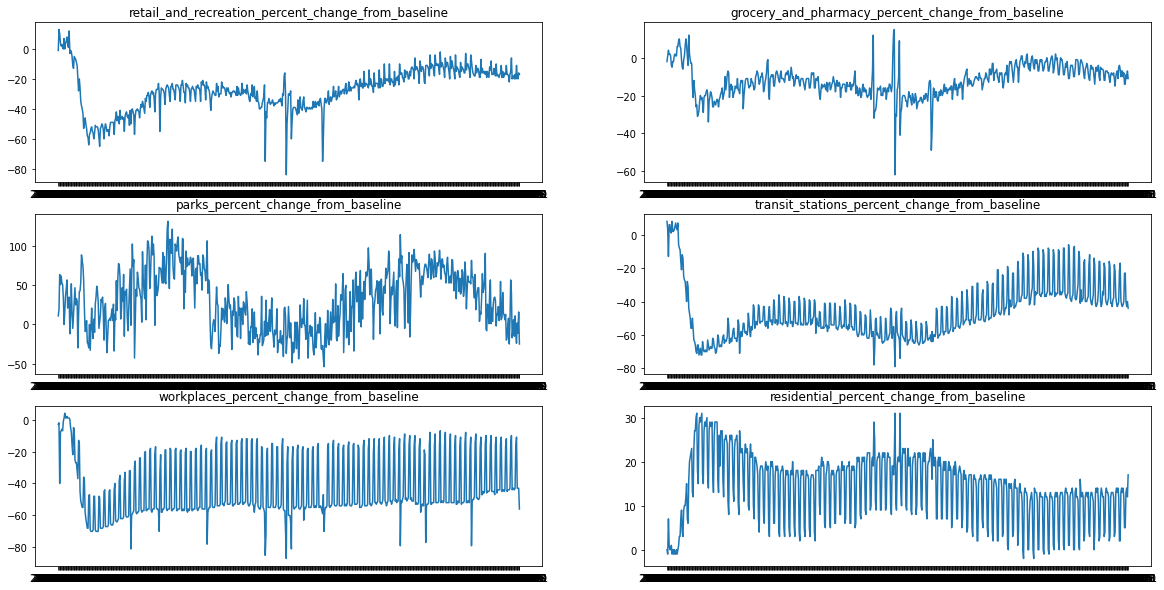

In [2]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(3, 2,figsize=(20,10))
fig1 = axis[0, 0].plot(df['date'], df['retail_and_recreation_percent_change_from_baseline'])
fig1 = axis[0, 0].set_title("retail_and_recreation_percent_change_from_baseline")
fig2 = axis[0, 1].plot(df['date'], df['grocery_and_pharmacy_percent_change_from_baseline'])
fig2 = axis[0, 1].set_title("grocery_and_pharmacy_percent_change_from_baseline")
fig3 = axis[1, 0].plot(df['date'], df['parks_percent_change_from_baseline'])
fig3 = axis[1, 0].set_title("parks_percent_change_from_baseline")
fig4 = axis[1, 1].plot(df['date'], df['transit_stations_percent_change_from_baseline'])
fig4 = axis[1, 1].set_title("transit_stations_percent_change_from_baseline")
fig5 = axis[2, 0].plot(df['date'], df['workplaces_percent_change_from_baseline'])
fig5 = axis[2, 0].set_title("workplaces_percent_change_from_baseline")
fig6 = axis[2, 1].plot(df['date'], df['residential_percent_change_from_baseline'])
fig6 = axis[2, 1].set_title("residential_percent_change_from_baseline")

title_list = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline' , 'residential_percent_change_from_baseline']

## RSD

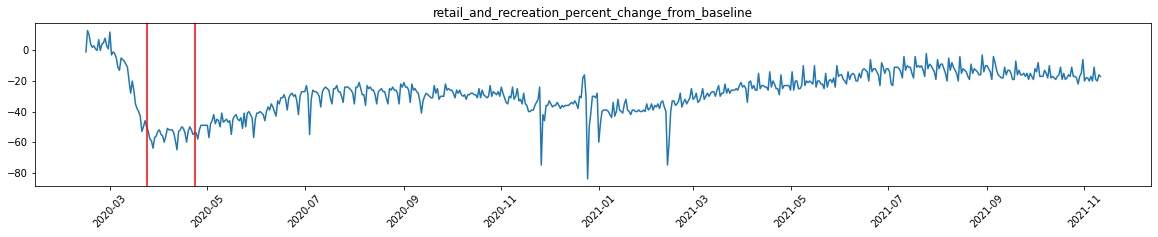

0: (TimeSeriesChangePoint(start_time: 2020-03-24T00:00:00.000000000, end_time: 2020-03-24T00:00:00.000000000, confidence: 0.9669305695418119), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x12881de50>)
1: (TimeSeriesChangePoint(start_time: 2020-04-23T00:00:00.000000000, end_time: 2020-04-23T00:00:00.000000000, confidence: 0.9939701859639637), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x128bbe130>)


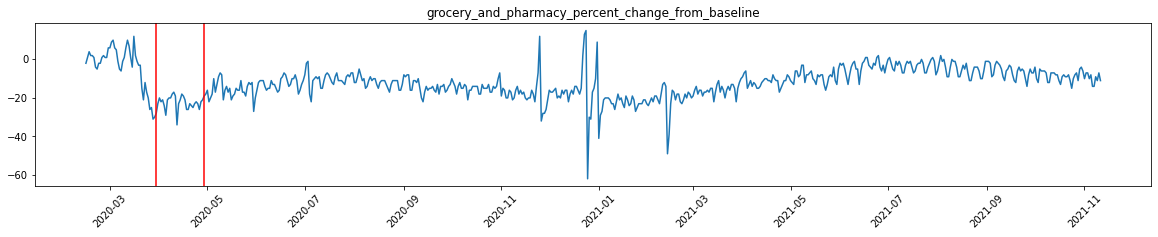

0: (TimeSeriesChangePoint(start_time: 2020-03-30T00:00:00.000000000, end_time: 2020-03-30T00:00:00.000000000, confidence: 0.9711175137236464), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x12975cc40>)
1: (TimeSeriesChangePoint(start_time: 2020-04-29T00:00:00.000000000, end_time: 2020-04-29T00:00:00.000000000, confidence: 0.9847377592466624), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x1289b5610>)


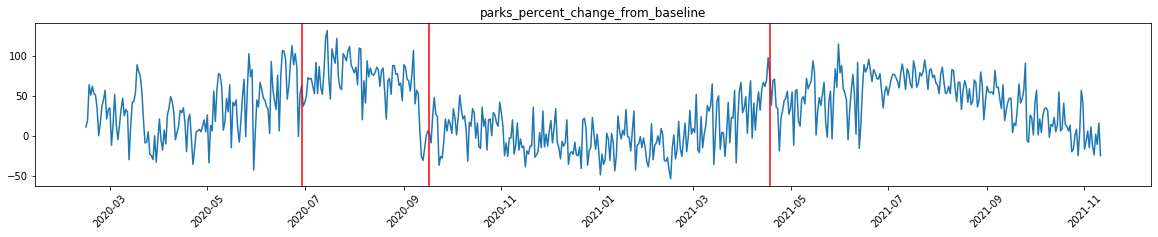

0: (TimeSeriesChangePoint(start_time: 2020-06-29T00:00:00.000000000, end_time: 2020-06-29T00:00:00.000000000, confidence: 0.9592872911838433), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x128df3640>)
1: (TimeSeriesChangePoint(start_time: 2020-09-17T00:00:00.000000000, end_time: 2020-09-17T00:00:00.000000000, confidence: 0.9565634191368688), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x129c98070>)
2: (TimeSeriesChangePoint(start_time: 2021-04-18T00:00:00.000000000, end_time: 2021-04-18T00:00:00.000000000, confidence: 0.9523678770207339), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x1289b5310>)


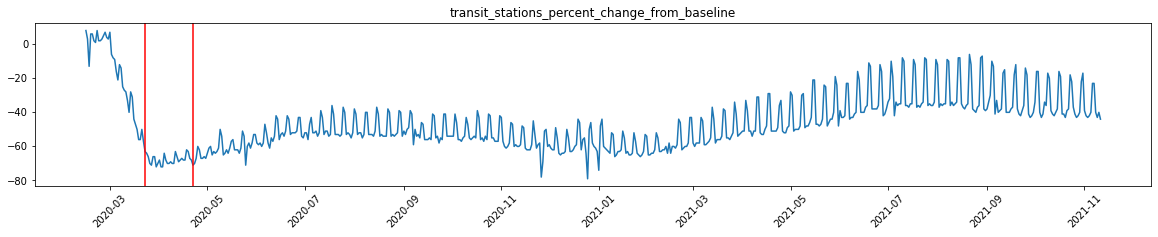

0: (TimeSeriesChangePoint(start_time: 2020-03-23T00:00:00.000000000, end_time: 2020-03-23T00:00:00.000000000, confidence: 0.9578972889327381), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x129f4b550>)
1: (TimeSeriesChangePoint(start_time: 2020-04-22T00:00:00.000000000, end_time: 2020-04-22T00:00:00.000000000, confidence: 0.994736145568642), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x129f4b820>)


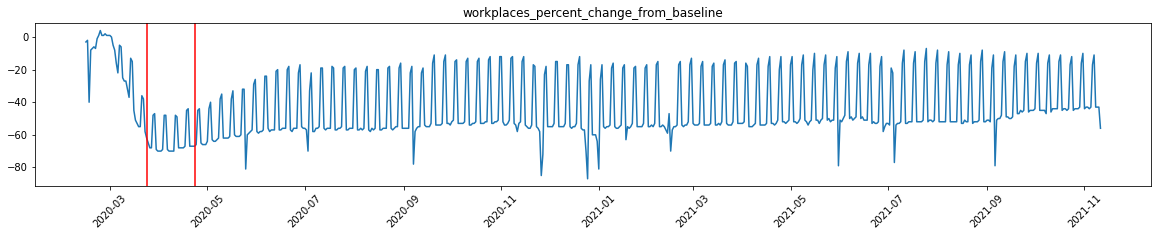

0: (TimeSeriesChangePoint(start_time: 2020-03-24T00:00:00.000000000, end_time: 2020-03-24T00:00:00.000000000, confidence: 0.9546451847816282), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x12a17f940>)
1: (TimeSeriesChangePoint(start_time: 2020-04-23T00:00:00.000000000, end_time: 2020-04-23T00:00:00.000000000, confidence: 0.9945713166695047), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x129dc99d0>)


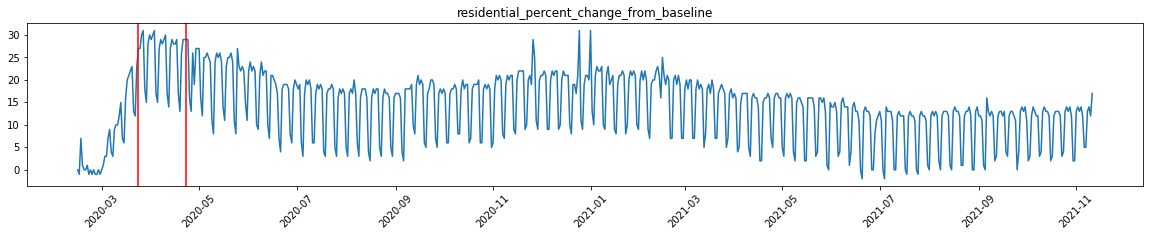

0: (TimeSeriesChangePoint(start_time: 2020-03-24T00:00:00.000000000, end_time: 2020-03-24T00:00:00.000000000, confidence: 0.9659445210165061), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x128c2c700>)
1: (TimeSeriesChangePoint(start_time: 2020-04-23T00:00:00.000000000, end_time: 2020-04-23T00:00:00.000000000, confidence: 0.9916347793150854), <kats.detectors.robust_stat_detection.RobustStatMetadata object at 0x129f4b580>)


In [6]:
# import package
from kats.consts import TimeSeriesData
from kats.detectors.robust_stat_detection import RobustStatDetector
import matplotlib

df['time']=pd.to_datetime(df['date'])

tsd1 = TimeSeriesData(df.loc[:,['time', 'retail_and_recreation_percent_change_from_baseline']])
tsd2 = TimeSeriesData(df.loc[:,['time', 'grocery_and_pharmacy_percent_change_from_baseline']])
tsd3 = TimeSeriesData(df.loc[:,['time', 'parks_percent_change_from_baseline']])
tsd4 = TimeSeriesData(df.loc[:,['time', 'transit_stations_percent_change_from_baseline']])
tsd5 = TimeSeriesData(df.loc[:,['time', 'workplaces_percent_change_from_baseline']])
tsd6 = TimeSeriesData(df.loc[:,['time', 'residential_percent_change_from_baseline']])
tsd_list = [tsd1, tsd2, tsd3, tsd4, tsd5, tsd6]
fig_list = [fig1, fig2, fig3, fig4, fig5, fig6]


for i in range(0,6):
    detector = RobustStatDetector(tsd_list[i])
    change_points = detector.detector(comparison_window=20, smoothing_window_size=30, p_value_cutoff=0.05)
    plt.title(title_list[i])
    plt.rcParams["figure.figsize"] = (20,3)
    plt.xticks(rotation=45)
    fig_list[i] = detector.plot(change_points)
    j = 0
    for entry in change_points:
      print(str(j) + ":", entry)
      j += 1

## BOCPD

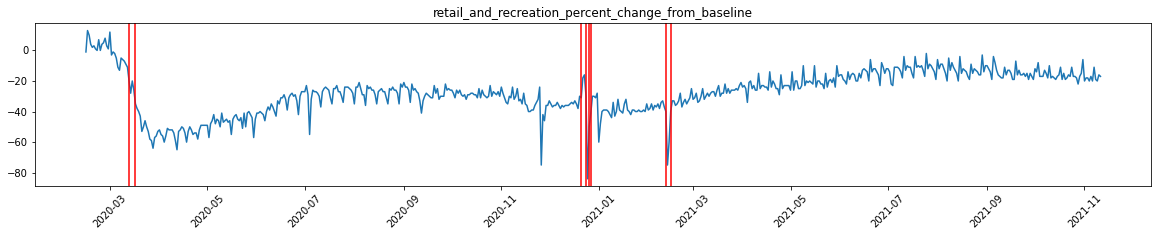

0: (TimeSeriesChangePoint(start_time: 2020-03-13T00:00:00.000000000, end_time: 2020-03-13T00:00:00.000000000, confidence: 0.6449633533660475), <kats.detectors.bocpd.BOCPDMetadata object at 0x110c38610>)
1: (TimeSeriesChangePoint(start_time: 2020-03-17T00:00:00.000000000, end_time: 2020-03-17T00:00:00.000000000, confidence: 0.5734349609605085), <kats.detectors.bocpd.BOCPDMetadata object at 0x11ed752e0>)
2: (TimeSeriesChangePoint(start_time: 2020-12-21T00:00:00.000000000, end_time: 2020-12-21T00:00:00.000000000, confidence: 0.605730029744004), <kats.detectors.bocpd.BOCPDMetadata object at 0x11ed75550>)
3: (TimeSeriesChangePoint(start_time: 2020-12-24T00:00:00.000000000, end_time: 2020-12-24T00:00:00.000000000, confidence: 0.9799866236723197), <kats.detectors.bocpd.BOCPDMetadata object at 0x11ed75850>)
4: (TimeSeriesChangePoint(start_time: 2020-12-26T00:00:00.000000000, end_time: 2020-12-26T00:00:00.000000000, confidence: 0.6767852959190367), <kats.detectors.bocpd.BOCPDMetadata object at 

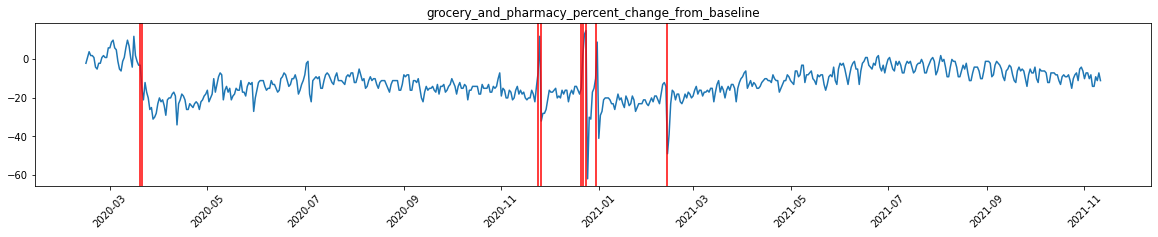

0: (TimeSeriesChangePoint(start_time: 2020-03-20T00:00:00.000000000, end_time: 2020-03-20T00:00:00.000000000, confidence: 0.5144251518998189), <kats.detectors.bocpd.BOCPDMetadata object at 0x127c38460>)
1: (TimeSeriesChangePoint(start_time: 2020-03-21T00:00:00.000000000, end_time: 2020-03-21T00:00:00.000000000, confidence: 0.5431934137148369), <kats.detectors.bocpd.BOCPDMetadata object at 0x11ed579a0>)
2: (TimeSeriesChangePoint(start_time: 2020-11-24T00:00:00.000000000, end_time: 2020-11-24T00:00:00.000000000, confidence: 0.764963031656905), <kats.detectors.bocpd.BOCPDMetadata object at 0x1284b7e20>)
3: (TimeSeriesChangePoint(start_time: 2020-11-26T00:00:00.000000000, end_time: 2020-11-26T00:00:00.000000000, confidence: 0.8708412220331878), <kats.detectors.bocpd.BOCPDMetadata object at 0x11f16b730>)
4: (TimeSeriesChangePoint(start_time: 2020-12-21T00:00:00.000000000, end_time: 2020-12-21T00:00:00.000000000, confidence: 0.5493512268287809), <kats.detectors.bocpd.BOCPDMetadata object at 

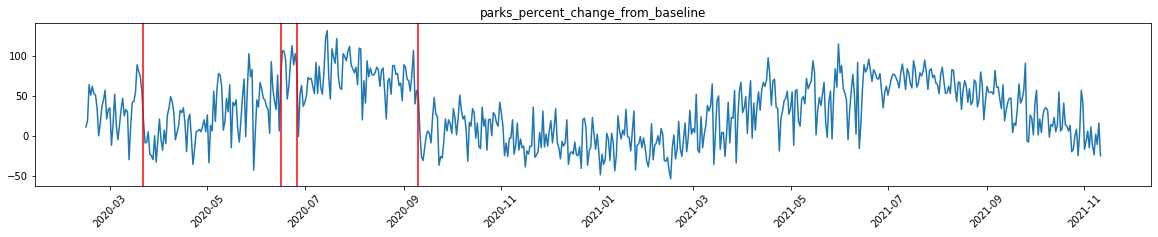

0: (TimeSeriesChangePoint(start_time: 2020-03-22T00:00:00.000000000, end_time: 2020-03-22T00:00:00.000000000, confidence: 0.5886695024793278), <kats.detectors.bocpd.BOCPDMetadata object at 0x11ed755e0>)
1: (TimeSeriesChangePoint(start_time: 2020-06-16T00:00:00.000000000, end_time: 2020-06-16T00:00:00.000000000, confidence: 0.7397638217497791), <kats.detectors.bocpd.BOCPDMetadata object at 0x127c3fe80>)
2: (TimeSeriesChangePoint(start_time: 2020-06-26T00:00:00.000000000, end_time: 2020-06-26T00:00:00.000000000, confidence: 0.6623191270842163), <kats.detectors.bocpd.BOCPDMetadata object at 0x127c3f7c0>)
3: (TimeSeriesChangePoint(start_time: 2020-09-10T00:00:00.000000000, end_time: 2020-09-10T00:00:00.000000000, confidence: 0.5795082215206614), <kats.detectors.bocpd.BOCPDMetadata object at 0x128680a30>)


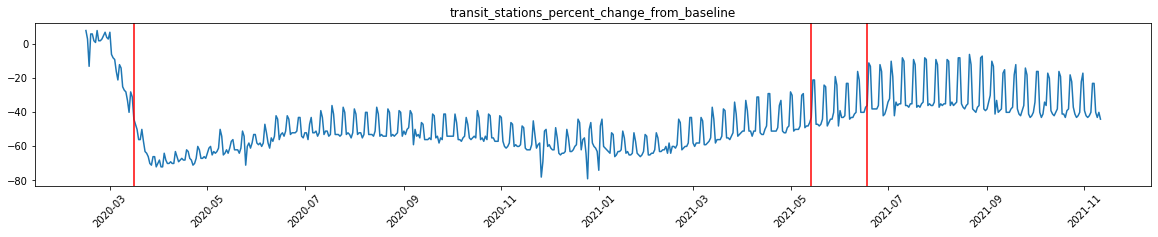

0: (TimeSeriesChangePoint(start_time: 2020-03-16T00:00:00.000000000, end_time: 2020-03-16T00:00:00.000000000, confidence: 0.5114881902737165), <kats.detectors.bocpd.BOCPDMetadata object at 0x1284b7e50>)
1: (TimeSeriesChangePoint(start_time: 2021-05-14T00:00:00.000000000, end_time: 2021-05-14T00:00:00.000000000, confidence: 0.6931870045808584), <kats.detectors.bocpd.BOCPDMetadata object at 0x127e43a00>)
2: (TimeSeriesChangePoint(start_time: 2021-06-18T00:00:00.000000000, end_time: 2021-06-18T00:00:00.000000000, confidence: 0.6573076199354785), <kats.detectors.bocpd.BOCPDMetadata object at 0x128695f70>)


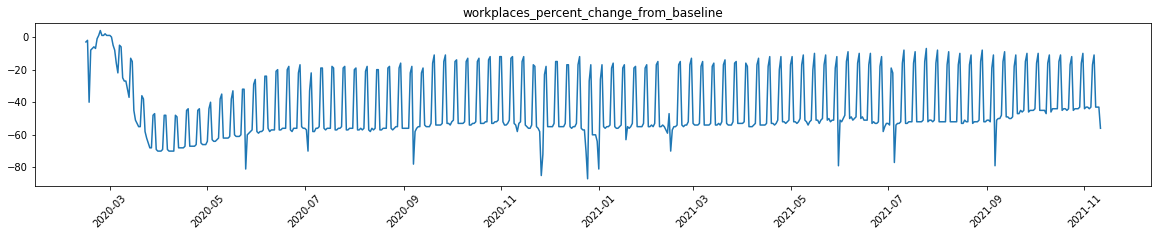

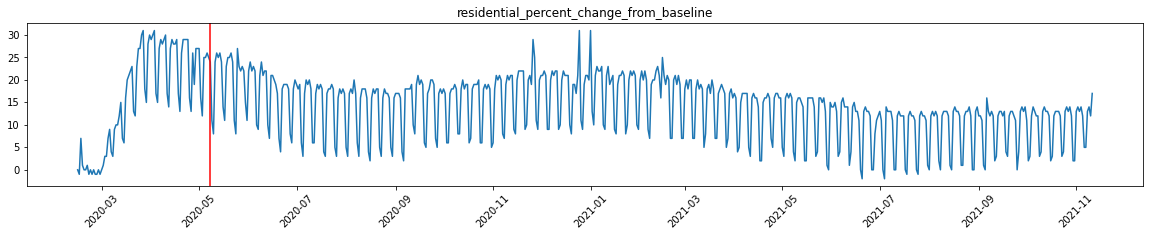

0: (TimeSeriesChangePoint(start_time: 2020-05-08T00:00:00.000000000, end_time: 2020-05-08T00:00:00.000000000, confidence: 0.5105019350420882), <kats.detectors.bocpd.BOCPDMetadata object at 0x1279bc490>)


In [4]:
# import package
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, NormalKnownParameters, TrendChangeParameters, PoissonModelParameters
from kats.consts import TimeSeriesData

df['time']=pd.to_datetime(df['date'])

tsd1 = TimeSeriesData(df.loc[:,['time', 'retail_and_recreation_percent_change_from_baseline']])
tsd2 = TimeSeriesData(df.loc[:,['time', 'grocery_and_pharmacy_percent_change_from_baseline']])
tsd3 = TimeSeriesData(df.loc[:,['time', 'parks_percent_change_from_baseline']])
tsd4 = TimeSeriesData(df.loc[:,['time', 'transit_stations_percent_change_from_baseline']])
tsd5 = TimeSeriesData(df.loc[:,['time', 'workplaces_percent_change_from_baseline']])
tsd6 = TimeSeriesData(df.loc[:,['time', 'residential_percent_change_from_baseline']])
tsd_list = [tsd1, tsd2, tsd3, tsd4, tsd5, tsd6]
fig_list = [fig1, fig2, fig3, fig4, fig5, fig6]

#parameters for normal probability model
model_dist_paramters = NormalKnownParameters()
model_dist_paramters.empirical=True
model_dist_paramters.known_prec_multiplier=[1.0, 2.0, 3.0, 4.0, 5.0]

for i in range(0,6):
    detector = BOCPDetector(tsd_list[i])
    change_points = detector.detector(model=BOCPDModelType.NORMAL_KNOWN_MODEL, model_parameters=model_dist_paramters,)
    plt.title(title_list[i])
    plt.rcParams["figure.figsize"] = (20,3)
    plt.xticks(rotation=45)
    fig_list[i] = detector.plot(change_points)
    j = 0
    for entry in change_points:
      print(str(j) + ":", entry)
      j += 1

## CUSUM

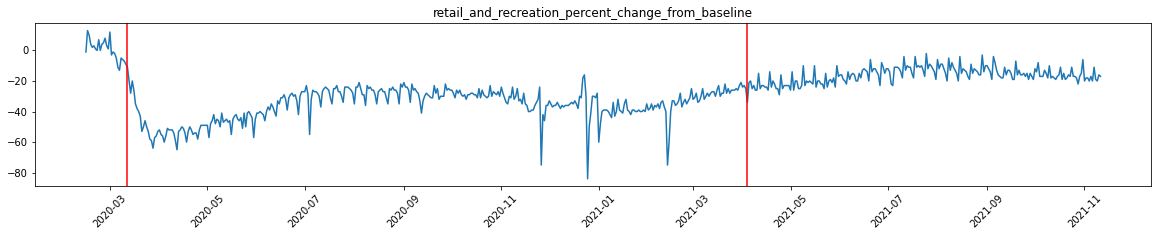

0: (TimeSeriesChangePoint(start_time: 2021-04-04 00:00:00, end_time: 2021-04-04 00:00:00, confidence: 1.0), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x11f291ca0>)
1: (TimeSeriesChangePoint(start_time: 2020-03-12 00:00:00, end_time: 2020-03-12 00:00:00, confidence: 1.0), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x10f6f3af0>)


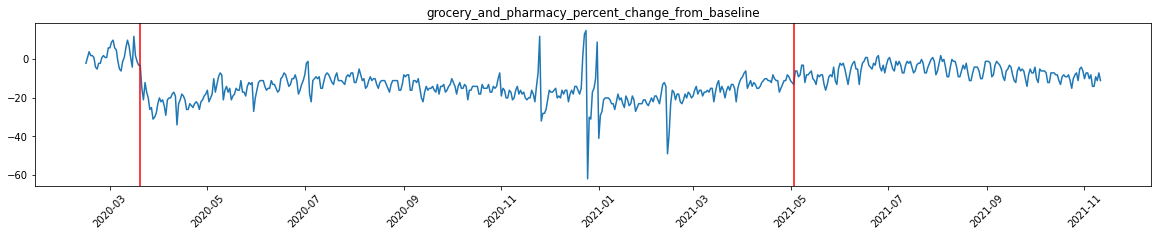

0: (TimeSeriesChangePoint(start_time: 2021-05-03 00:00:00, end_time: 2021-05-03 00:00:00, confidence: 1.0), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x1286a91f0>)
1: (TimeSeriesChangePoint(start_time: 2020-03-20 00:00:00, end_time: 2020-03-20 00:00:00, confidence: 1.0), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x129192640>)


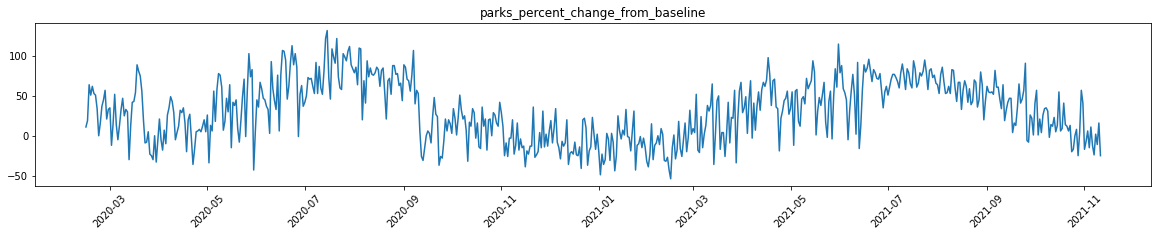

0: (TimeSeriesChangePoint(start_time: 2021-03-29 00:00:00, end_time: 2021-03-29 00:00:00, confidence: 0.9999999999964628), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x128f64dc0>)
1: (TimeSeriesChangePoint(start_time: 2020-09-10 00:00:00, end_time: 2020-09-10 00:00:00, confidence: 0.9999999999984178), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x12955ed00>)


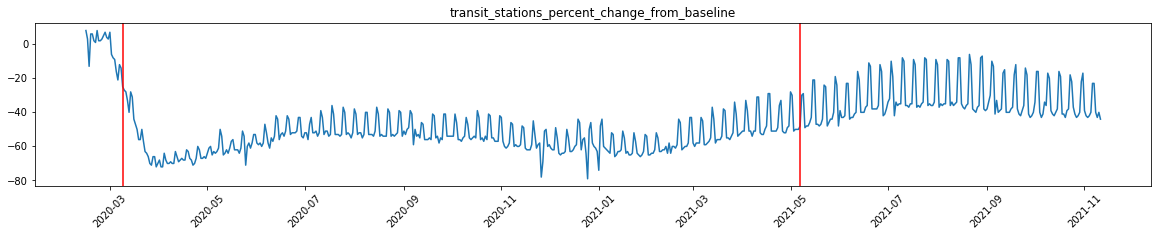

0: (TimeSeriesChangePoint(start_time: 2021-05-07 00:00:00, end_time: 2021-05-07 00:00:00, confidence: 1.0), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x128f64610>)
1: (TimeSeriesChangePoint(start_time: 2020-03-09 00:00:00, end_time: 2020-03-09 00:00:00, confidence: 1.0), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x11382ad90>)


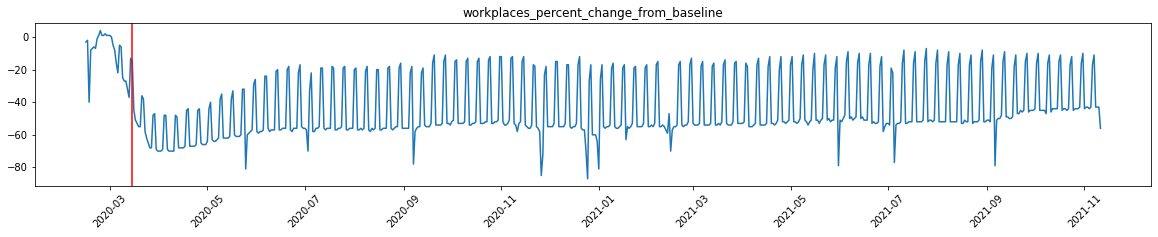

0: (TimeSeriesChangePoint(start_time: 2021-04-16 00:00:00, end_time: 2021-04-16 00:00:00, confidence: 0.9926003975580808), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x1298d5580>)
1: (TimeSeriesChangePoint(start_time: 2020-03-15 00:00:00, end_time: 2020-03-15 00:00:00, confidence: 1.0), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x129c784f0>)


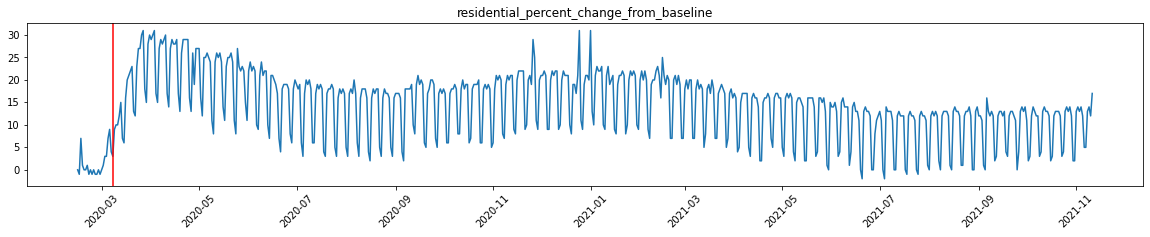

0: (TimeSeriesChangePoint(start_time: 2020-03-08 00:00:00, end_time: 2020-03-08 00:00:00, confidence: 0.9999999999999999), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x129a6fb80>)
1: (TimeSeriesChangePoint(start_time: 2021-04-02 00:00:00, end_time: 2021-04-02 00:00:00, confidence: 1.0), <kats.detectors.cusum_detection.CUSUMMetadata object at 0x1288575b0>)


In [5]:
# import packages for cusum
from kats.detectors.cusum_detection import CUSUMDetector
from kats.consts import TimeSeriesData,TimeSeriesChangePoint

df['time']=pd.to_datetime(df['date'])

tsd1 = TimeSeriesData(df.loc[:,['time', 'retail_and_recreation_percent_change_from_baseline']])
tsd2 = TimeSeriesData(df.loc[:,['time', 'grocery_and_pharmacy_percent_change_from_baseline']])
tsd3 = TimeSeriesData(df.loc[:,['time', 'parks_percent_change_from_baseline']])
tsd4 = TimeSeriesData(df.loc[:,['time', 'transit_stations_percent_change_from_baseline']])
tsd5 = TimeSeriesData(df.loc[:,['time', 'workplaces_percent_change_from_baseline']])
tsd6 = TimeSeriesData(df.loc[:,['time', 'residential_percent_change_from_baseline']])
tsd_list = [tsd1, tsd2, tsd3, tsd4, tsd5, tsd6]
fig_list = [fig1, fig2, fig3, fig4, fig5, fig6]

for i in range(0,6):
    detector = CUSUMDetector(tsd_list[i])
    change_points = detector.detector(return_all_changepoints=True)
    plt.title(title_list[i])
    plt.rcParams["figure.figsize"] = (20,3)
    plt.xticks(rotation=45)
    fig_list[i] = detector.plot(change_points)
    j = 0
    for entry in change_points:
      print(str(j) + ":", entry)
      j += 1